# Segmentation

Segmentation consists in identifying different areas in an image.

I download an MRI from http://brain-development.org

In [2]:
import ants
import numpy as np

First we load an image

In [3]:
img = ants.image_read('Hammers/a01.nii.gz')

Then we check if the image has headers

In [23]:
try:
    img.image_header_info()
except:
    print('Good luck next time')

Good luck next time


In [ ]:
Next lets check the image

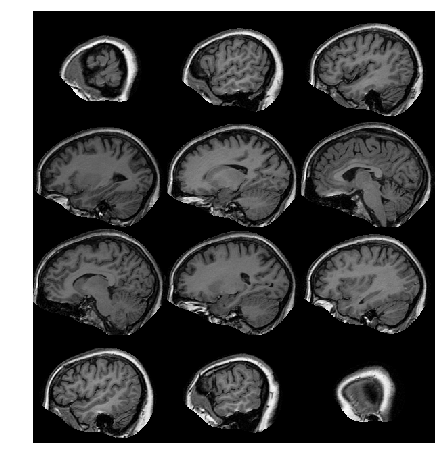

In [5]:
img.plot()

It is a 3D image and we have a file with a manual segmentation. Lets check it out

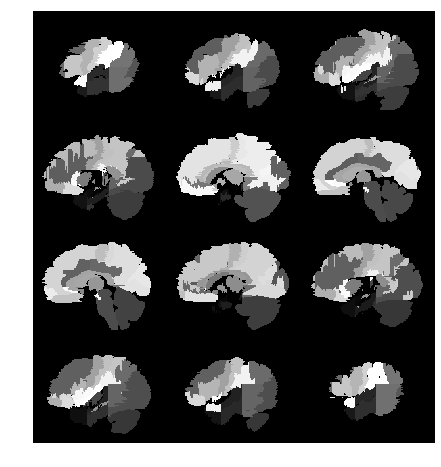

In [25]:
img_seg = ants.image_read('Hammers/a01-seg.nii.gz')
img_seg.plot()

They segmented a bunch of different areas. We will go only with Grey matter, White matter and fluids for now.

First we need to obtain a mask (this allows us to have a rough estimation of where the image is)

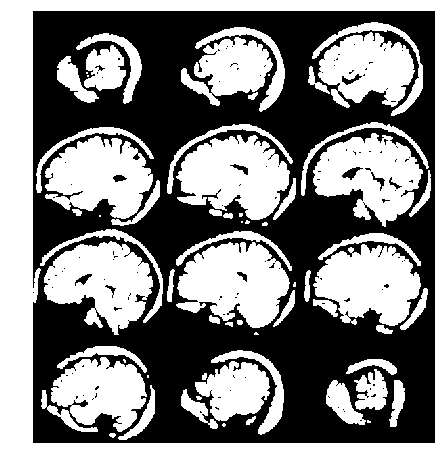

In [26]:
mask = ants.get_mask(img)
mask.plot()

Now that we have the mask, lets segment it. Locally for me it takes 1 minute. idk how long would it take in the geppetto-cluster, so wait a little... 

In [27]:
# We are specifying 3 for kmeans (because I am only interested in grey, white and fluids)
img_seg = ants.atropos(a=img, m='[0.2,1x1x1]', c='[2,0]', 
                       i='kmeans[3]', x=mask)

Lets plot the results

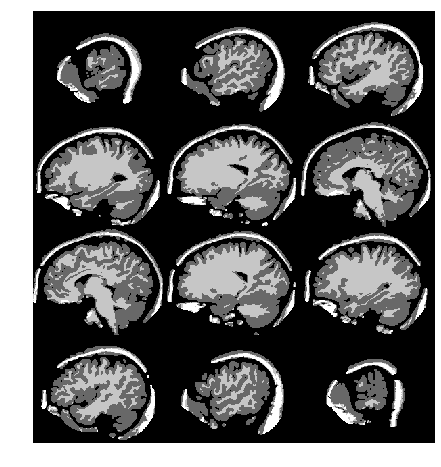

In [28]:
ants.plot(img_seg['segmentation'])

This is just an example of how to segment a 3D image, but the actual pipeline would have to:
1. Co-register the PET images to another type of image with good spatial resolution (MRI for instance).
2. Co-register the image that has good spatial resolution (MRI image) to an ATLAS.
3. Segment the image that has good spatial resolution (MRI image).
4. Now that we have a path from PET to MRI and from MRI to ATLAS, we can register PET against an ATLAS (using MRI as the link).

### I still need to investigate this pipeline and put together an script for it

ANTSPY is an Python ANTS implementation (it does not have everything but it is good enough). 

ANTS uses ITK which is a tested and used library. Most 🐍 📦 will use ITK under the hood.

## NOTE: Probably I need to specify i='kmeans[3]' in the segmentation to put the skull in a different area and check if I get the fluids.